<a href="https://colab.research.google.com/github/besomlu/stock_study/blob/main/6_%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0_%ED%99%9C%EC%9A%A9_SPY_%EB%A7%A4%EC%88%98_%EC%8B%9C%EC%A0%90_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 설치하고 사용할 것
3. SPY ETF의 종가를 불러올 것
4. 2020년 이후의 기간을 사용할 것.
5. SPY 종가의 그래프를 그리고 60일 이동평균선, 240일 이동평균선을 함께 그릴 것

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.1 MB/s eta 0:00:00
Selecting previously unselected package fonts-nanum.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


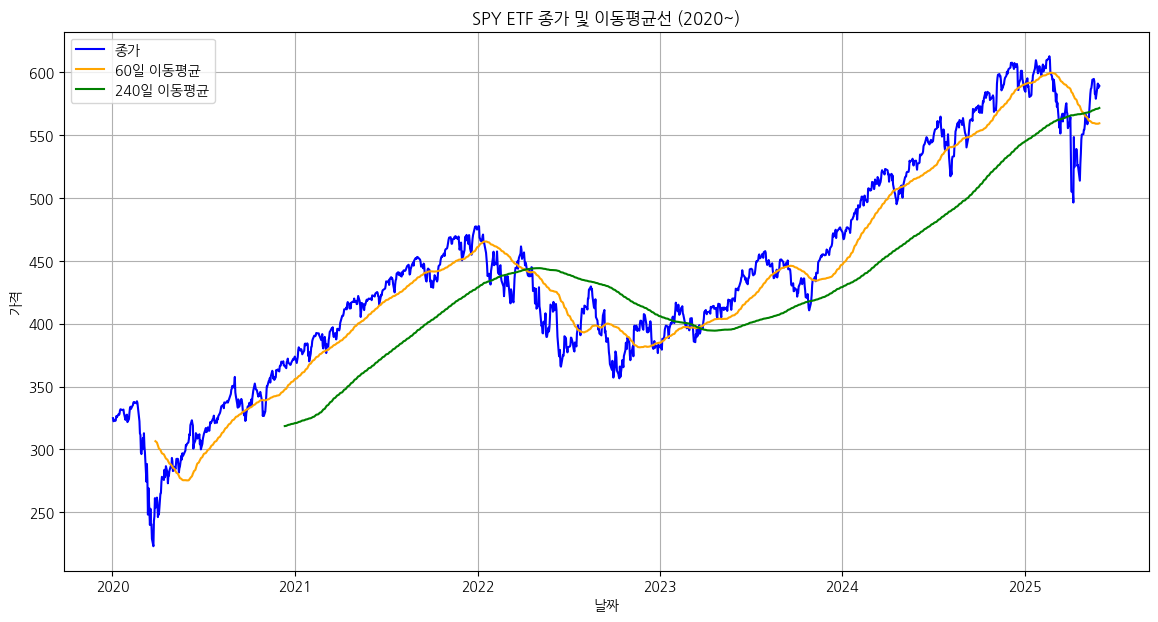

In [1]:
# 1. 필요한 패키지 설치
!pip install -q finance-datareader
!apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pandas as pd
import FinanceDataReader as fdr

# 2. 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 3. SPY ETF 종가 데이터 불러오기 (2020년 이후)
df = fdr.DataReader('SPY', '2020')

# 4. 이동평균선 계산
df['MA60'] = df['Close'].rolling(window=60).mean()
df['MA240'] = df['Close'].rolling(window=240).mean()

# 5. 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='종가', color='blue')
plt.plot(df.index, df['MA60'], label='60일 이동평균', color='orange')
plt.plot(df.index, df['MA240'], label='240일 이동평균', color='green')
plt.title('SPY ETF 종가 및 이동평균선 (2020~)')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.grid(True)
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 설치하고 사용할 것
3. SPY ETF의 종가를 불러올 것
4. SPY 종가의 그래프를 그리고
매일 과거 252일 동안의 종가 중 상위 10% 위치에 해당하는 값과 하위 10% 위치에 해당하는 값을 함꼐 그래프에 그릴 것
5. 2020년 이후의 기간부터 그래프에 표시할 것

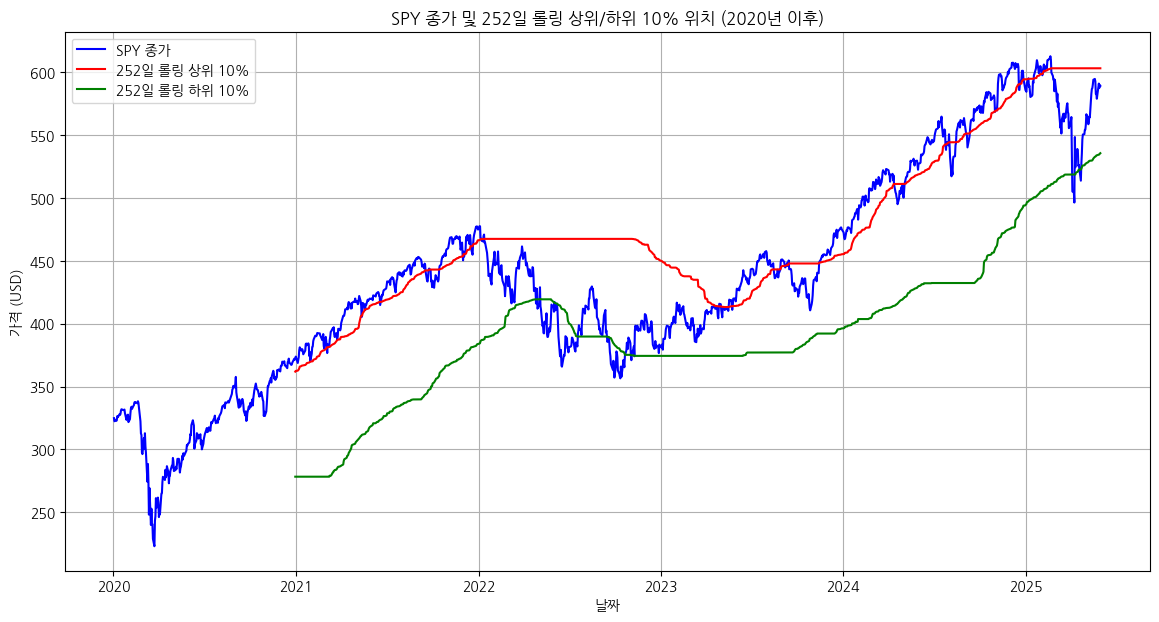

In [8]:
# 1. 필요한 패키지 설치
!pip install -q finance-datareader
!apt-get -qq -y install fonts-nanum

# 2. 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import FinanceDataReader as fdr

# 3. 나눔고딕 폰트 등록 및 matplotlib 한글 설정
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 정상 출력

# 4. SPY ETF 종가 데이터 불러오기
df = fdr.DataReader('SPY')

# 5. 2020년 이후 데이터 필터링
df = df[df.index >= '2020-01-01']

# 6. 매일 과거 252일간 상위 10%, 하위 10% 위치 계산
df['상위10%'] = df['Close'].rolling(window=252).quantile(0.9)
df['하위10%'] = df['Close'].rolling(window=252).quantile(0.1)

# 7. 그래프 그리기
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Close'], label='SPY 종가', color='blue')
plt.plot(df.index, df['상위10%'], label='252일 롤링 상위 10%', color='red')
plt.plot(df.index, df['하위10%'], label='252일 롤링 하위 10%', color='green')

plt.title('SPY 종가 및 252일 롤링 상위/하위 10% 위치 (2020년 이후)')
plt.xlabel('날짜')
plt.ylabel('가격 (USD)')
plt.legend()
plt.grid(True)
plt.show()


# 하위 순위 수익률을 이용한 투자 시점 표시


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 설치하고 사용할 것
3. SPY ETF의 종가를 불러올 것
4. SPY 종가의 그래프를 그리고
매일 과거 252일 동안의 종가 중 상위 10% 위치에 해당하는 값과 하위 10% 위치에 해당하는 값을 함께 그래프에 그릴 것
5. 2020년 이후의 기간부터 그래프에 모두 표시할 것. 이를 위해서 계산 기간을 적절하게 늘릴 것
6. 하위 10% 위치값을 하회하면 매수를 하는데, 매수하는 시점을 그래프에 세로줄로
표시할 것

<ipython-input-12-c671609a8c85>:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  buy_dates = df.index[df['매수신호'] & (~df['매수신호'].shift(1).fillna(False))]


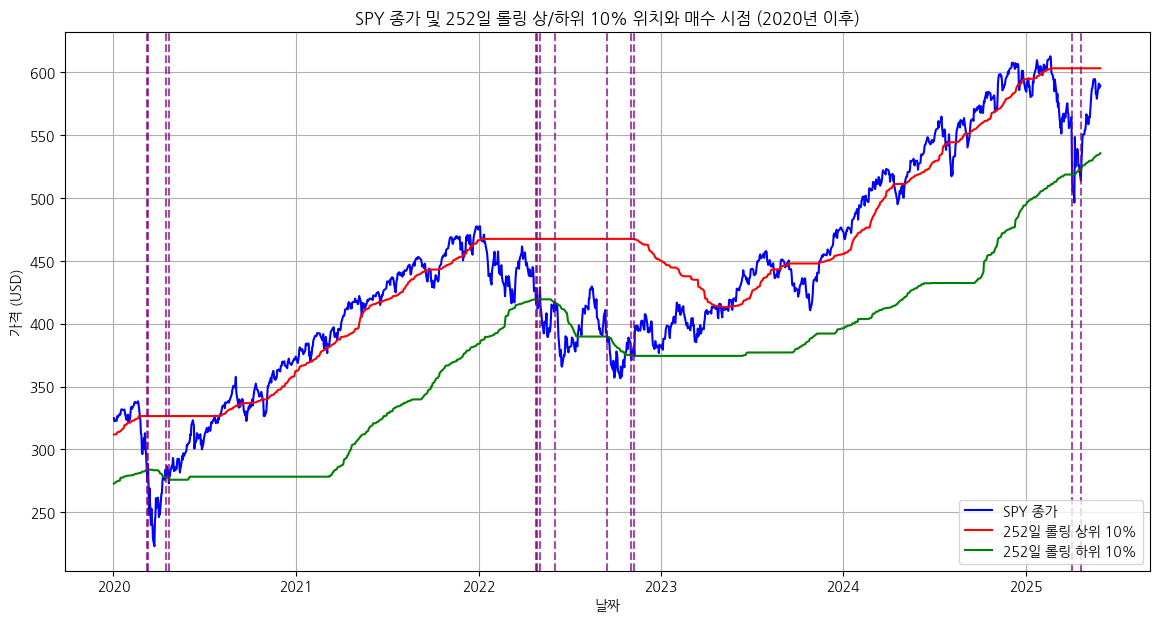

In [12]:
# 1. 패키지 설치
!pip install -q finance-datareader
!apt-get -qq -y install fonts-nanum

# 2. 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import FinanceDataReader as fdr

# 3. 나눔고딕 폰트 등록 및 한글 설정
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 4. SPY ETF 데이터 (252일 rolling 계산을 위해 2020년 이전 기간부터 충분히 불러오기)
start_date = '2018-01-01'  # 2020년 이후 데이터를 완벽히 계산하려면 2018년 정도부터
df = fdr.DataReader('SPY', start=start_date)

# 5. 252일 롤링 상위 10%, 하위 10% 계산
df['상위10%'] = df['Close'].rolling(window=252).quantile(0.9)
df['하위10%'] = df['Close'].rolling(window=252).quantile(0.1)

# 6. 매수 신호: 종가가 하위 10% 위치 미만인 경우
df['매수신호'] = df['Close'] < df['하위10%']

# 7. 매수 신호 첫 발생 날짜만 추출 (연속 매수신호 중 첫 날)
buy_dates = df.index[df['매수신호'] & (~df['매수신호'].shift(1).fillna(False))]

# 8. 2020년 이후 데이터만 시각화
df_plot = df[df.index >= '2020-01-01']

# 9. 그래프 그리기
plt.figure(figsize=(14,7))
plt.plot(df_plot.index, df_plot['Close'], label='SPY 종가', color='blue')
plt.plot(df_plot.index, df_plot['상위10%'], label='252일 롤링 상위 10%', color='red')
plt.plot(df_plot.index, df_plot['하위10%'], label='252일 롤링 하위 10%', color='green')

# 매수 시점 세로선 (2020년 이후 매수 시점만 표시)
for date in buy_dates:
    if date >= pd.to_datetime('2020-01-01'):
        plt.axvline(x=date, color='purple', linestyle='--', alpha=0.7)

# 범례 중복 제거
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('SPY 종가 및 252일 롤링 상/하위 10% 위치와 매수 시점 (2020년 이후)')
plt.xlabel('날짜')
plt.ylabel('가격 (USD)')
plt.grid(True)
plt.show()
